# IA048 - Aprendizado de Máquina 
## Exercício de Fixação de Conceitos (EFC) 3 - 2s2020

In [3]:
%matplotlib inline
import pandas as pd 
import matplotlib.pyplot as plt
import sklearn as sk 
from sklearn import preprocessing
import numpy as np
import seaborn as sns 

In [4]:
data = pd.read_csv("dados_diabetes.csv")

In [6]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [9]:
data.info()
data["Outcome"].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


0    500
1    268
Name: Outcome, dtype: int64

As one may see from the last execution, our dataset is not balanced since we have 500 non-diabetics and 268 diabetics.

In [10]:
diabet = data.loc[data["Outcome"] == 1]
n_diabet = data.loc[data["Outcome"] == 0]

In [12]:
features = diabet.columns.tolist()

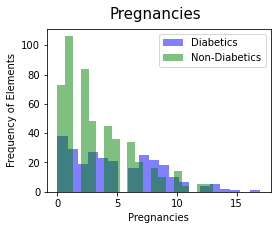

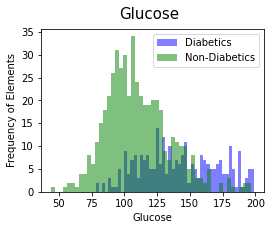

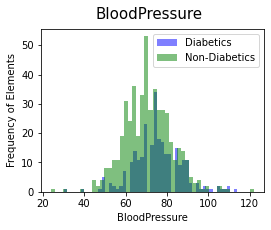

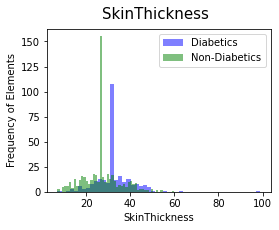

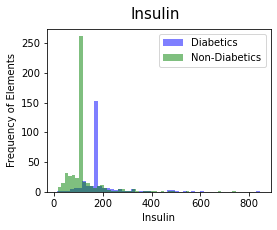

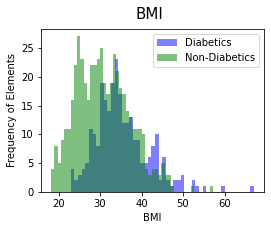

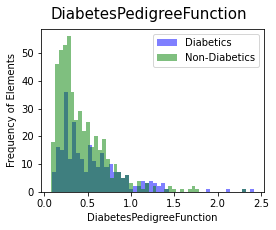

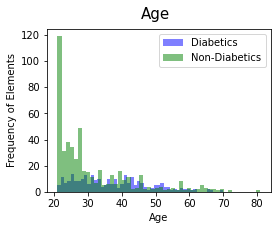

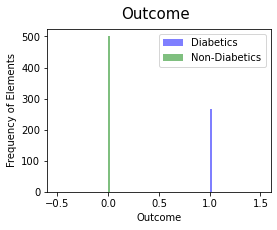

In [22]:
for k in features:
    plt.figure(figsize=(4,3),facecolor='white',edgecolor='black')
    if (k == "Pregnancies"):
        plt.hist(diabet[k],bins=20,alpha=0.5,label='Diabetics',color='Blue')
        plt.hist(n_diabet[k],bins=20,alpha=0.5,label='Non-Diabetics',color='Green')
    else:
        plt.hist(diabet[k],bins=50,alpha=0.5,label='Diabetics',color='Blue')
        plt.hist(n_diabet[k],bins=50,alpha=0.5,label='Non-Diabetics',color='Green')
    plt.legend(loc='upper right')
    plt.suptitle(k, fontsize = 15)
    plt.xlabel(k)
    plt.ylabel("Frequency of Elements")
    plt.show()

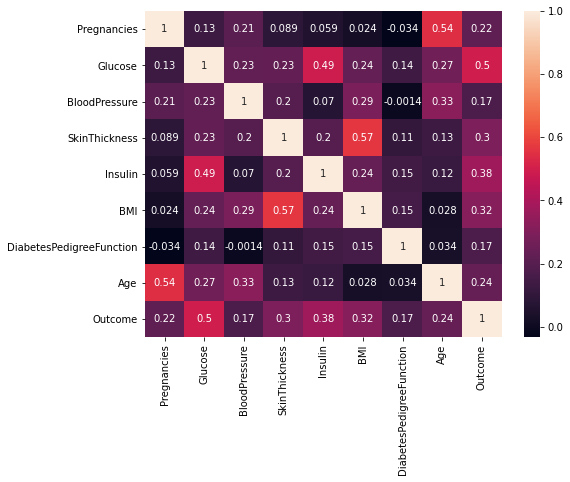

In [28]:
data_corr = data.corr()
plt.figure(figsize=(8,6))
sns.heatmap(data_corr, annot = True)
plt.show()

In [30]:
# Normalizing our data with the MinMax Scaler
data_np = data.values
min_max_scaler = preprocessing.MinMaxScaler()
data_np_norm = min_max_scaler.fit_transform(data_np)
data_norm = pd.DataFrame(data_np_norm, columns= data.columns)

In [39]:
# Separating the labels from the features
label = data_norm['Outcome']
x = data_norm.drop(columns=['Outcome'])

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,label,stratify=label,test_size=0.2)

In [51]:
# Let's observe if the train test stratified split worked well, we can verify if the proportion of samples
# in the class 0 and 1 are still around the same from the original data
display(y_train.value_counts())
display(y_test.value_counts())

0.0    400
1.0    214
Name: Outcome, dtype: int64

0.0    100
1.0     54
Name: Outcome, dtype: int64

In [ ]:
#Now that we pre-treated our data we may implement our Deep Learning models
import torch as th
